# 추천 시스템 기초 복습

## 1) 내용 기반 필터링 (Content-Based Filtering, CBF)

- 콘텐츠 유사도 기반으로 사용자에게 추천
- 사용자가 선택한 아이템과 유사한 아이템 추천

## 2) 협업 필터링 (Collaborative Filtering, CF)

- 다수의 사용자로부터 얻은 선호도 정보를 기반으로 사용자에게 추천
    1. 사용자 기반: 특정 사용자와 유사한 취향의 사용자가 선호한 아이템 추천
    2. 아이템 기만: 사용자가 선호한 아이템과 유사한 아이템 추천

## 3) 하이브리드 필터링

- 두 가지 이상의 추천시스템 알고리즘 조합

## 협업 필터링 구현 방식

### 1) 기억 기반
- 실제 평점 데이터를 메모리에 저장해 두고, 유사도를 계산하는 방식
- 한계점 존재
    1. 데이터 희소성 문제: 대부분의 사용자는 전체 아이템 중 극히 일부에만 평점 남김
    2. 확장성 문제: 사용자와 아이템 수가 증가할수록, 유사도를 계산해야 하는 쌍의 수가 기하급수적으로 늘어남
    3. 새로운 아이템 문제: 새로운 아이템은 상호작용 이력이 없으므로, 어떤 유저와도 유사도를 계산할 수 없어 추천될 기회가 없음

=> 한계 극복을 위해 **모델 기반 협업 필터링** 등장

# 1. 모델 기반 협업 필터링

## 1) 잠재 요인과 행렬 분해

### (1) 잠재 요인

- 사용자-아이템 상호작용 행렬에 숨겨져 있는, 사용자의 취향이나 아이템의 특성을 설명하는 '숨겨진 차원'
- 사람이 명시적으로 이해는 불가능, 모델이 스스로 평점 패턴을 수학적으로 학습한 추상적 개념

### (2) 행렬 분해 (Matrix Factorization, MF)

- User-Item 평점 행렬 $R_{m \times n}$이 사용자(User)의 취향 벡터 $P_{m \times k}$와 아이템(Item)의 특성 벡터 $Q^T_{k \times n}$의 내적으로 설명될 수 있다는 가설에서 출발
- 가설: $R$에 녹아 있는 평점$(r_{u, i})$은 결국 사용자 $u$의 잠재 요인 벡터 $p_u$와 아이템 $i$의 잠재 요인 벡터 $q_i$의 내적 결과
- 목표: 관측된 평점을 가장 잘 재현하는 가장 적절한 잠재 요인의 개수 $k$를 찾고, $R \approx P \times Q^T$가 되도록 $P$와 $Q^T$를 학습하는 것
- 평점 예측: $R$에서 비어있는 평점 $\hat{r}_{u, i}$는 학습된 잠재 요인 벡터를 내적하여 예측
$\\ \hat{r}*{u, i} = p\_u \cdot q\_i = \sum*{f=1}^{k} p\_{u, f} \cdot q\_{i, f}$\
(k = 잠재 요인의 개수(차원))

### MF 수행 방식

| **구분** | **접근 방식** | **특징** |
| --- | --- | --- |
| **SVD** | **수학적 분해 기법** | 행렬 대수학에 기반하여 행렬을 분해합니다. 희소 행렬에는 직접 적용 불가하여 결측치 처리가 필요합니다. |
| **SGD** | **최적화 알고리즘** | 경사 하강법 기반의 알고리즘으로, 관측된 평점에 대해서만 학습을 진행하여 희소성 문제를 우회적으로 해결합니다. |
| **NMF** | **제약 조건 기반 모델** | 분해된 행렬에 비음수(Non-Negative)라는 제약 조건을 추가하여 잠재 요인의 해석력을 높입니다. |
| **PMF** | **확률적 모델** | 평점 예측에 확률 분포를 사용하여 불확실성까지 모델링하는 통계적 접근법입니다. |

## 2) 최근 추천시스템의 방향성

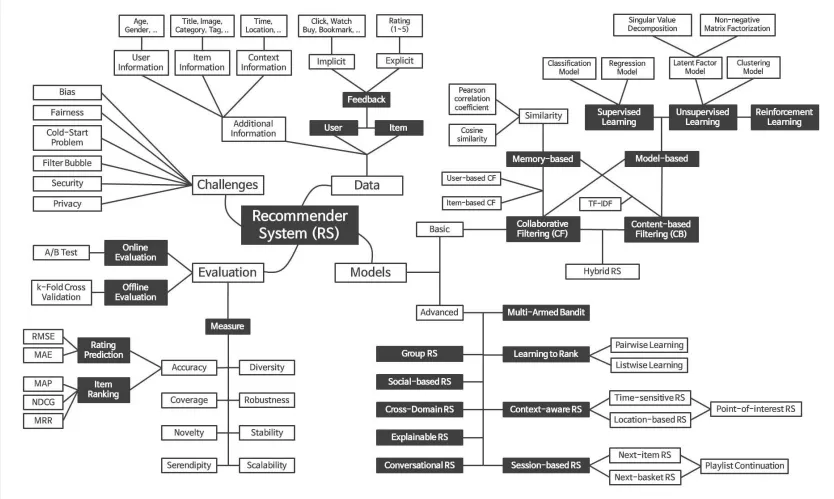

### (1) VAE 기반 협업 필터링

사용자의 아이템 상호작용 벡터를 입력으로 받아, 잠재 공간에서 재구성하도록 VAE를 학습하는 방식
- 기존 MF처럼 단일 포인트 벡터가 아니라 확률적 잠재 분포로 사용자 선호를 모델링해 불확실성 반영
- 희소한 상호작용 데이터에서도 강건함

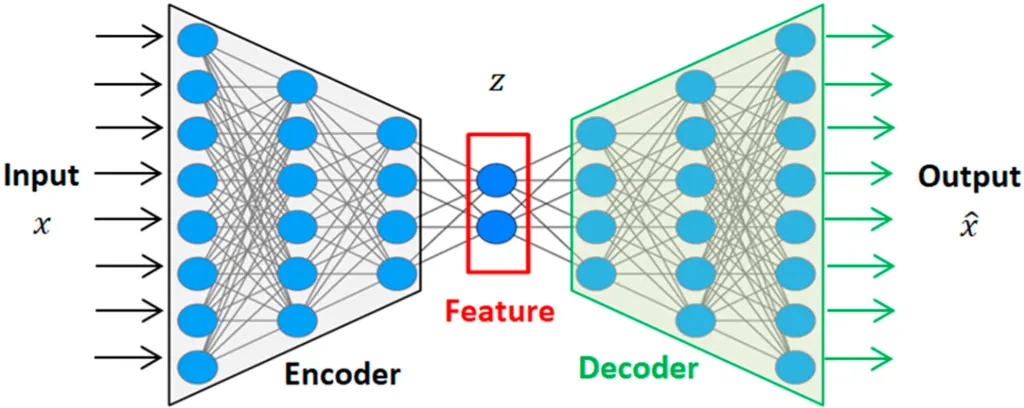

### (2) MF의 한계와 딥러닝 등장

| MF의 근본적 한계 | 내용 | 딥러닝의 해법 |
| --- | --- | --- |
| **선형성의 한계** | 평점 예측($\hat{r}_{u, i}$)이 단순한 잠재 벡터의 내적(Dot Product)으로만 이루어집니다. | 비선형 활성화 함수(ReLU 등)를 가진 신경망을 사용하여 복잡한 패턴을 학습합니다. |
| **불확실성 무시** | 사용자 취향을 단 하나의 벡터값(Point Estimate)으로만 표현합니다. | **확률 분포**로 취향을 모델링하여 데이터의 불확실성을 반영합니다. |

-> 이런 한계를 극복하기 위한 방식 중 하나가 VAE!

### (3) AE가 아니라 VAE인 이유?

| 구분 | AutoEncoder (AE) | Variational AutoEncoder (VAE) |
| --- | --- | --- |
| **잠재 벡터 표현** | 단일 값 (Point Estimate) | **확률 분포** (평균 $\mu$, 분산 $\sigma$) |
| **데이터 불확실성** | 반영 불가 (단순 복원에 집중) | **데이터의 불확실성을 모델링**하여 안정성 확보 |
| **적용 시 장점** | 비선형성 학습 | 희소한 데이터에서 더 **강건**하며, 일반화 성능 우수 |

-> 단일 값이 아닌 확률 분포를 통해 잠재 벡터를 표현
- 불확실성 모델링 + 희소한 데이터에도 강건 + 일반화 성능 우수

### (4) VAE 기반 CF의 작동 구조

| 구성 요소 | 역할 |
| --- | --- |
| **입력** ($x$) | 사용자의 아이템 상호작용 벡터 |
| **인코더** | 사용자 이력을 잠재변수 $z$ 분포로 매핑 |
| **잠재 벡터** ($z$) | 샘플링된 최종 취향 벡터 |
| **디코더** | $z$로부터 아이템 분포를 복원 |

### (5) VAE의 비밀 병기: 목적 함수와 KL Divergence

$\mathcal{L}(x; \theta, \phi) = \underbrace{E_{q_\phi(z|x)} [ \log p_\theta(x|z) ]}_{\text{재구성 오차 최소화 (Reconstruction Loss)}} - \underbrace{D_{\text{KL}}(q_\phi(z|x) || p(z))}_{\text{잠재 공간 정규화 (KL Divergence)}}$

1. 재구성 오차 최소화 (첫 번째 항)
- 목표: 디코더가 잠재 벡터 z를 사용해 원래 입력 x를 최대한 비슷하게 복원하도록 만듦 (like AE)

2. KL Divergence 항 (두 번째 항):
- 목표: 안코더가 출력하는 잠재 분포 $q(z|x)$가 사전 분포 $p(z)$ (표준 정규 분포)와 유사하도록 강제
- 역할: 모델이 특정 데이터에 과적합해 잠재 공간을 불규칙하게 만드는 것을 방지하고, 잠재 공간을 스무딩함 (VAE-CF가 희소 데이터에 강한 이유)

VAE-CF의 장점
1. 확률적 잠재 분포 모델링 (불확실성 반영)
- 기존 MF처럼 단일 포인트 벡터가 아니라 확률적 잠재 분포로 사용자 선호 모델링\
-> 예측 시의 불확실성을 반영하고 노이즈에 강건함.

2. 희소한 상호작용 데이터에도 강건함
- KL Divergence를 통해 잠재 공간을 정규화해 데이터 보간 능력이 뛰어나며, 희소성 문제에 효과적으로 대응함.

3. 비선형성 학습 
- 신경망 구조를 통해 MF의 한계였던 복잡하고 비선형적인 패턴을 학습해 추천 성능 극대화

## 2) GNN 기반 사용자 선호 예측

- VAE와 같은 딥러닝 잠재 요인 모델의 한계
    - '관계'나 '순서'라는 풍부한 정보를 활용하지 못함

### (1) Graphic Neural Network (GNN, 그래프 신경망)

- 사용자와 아이템의 상호작용이 서로 연결된 거대한 관계망(Graph)을 형성한다는 점에서 모티브를 얻음
- 사용자-아이템 상호작용은 본직적으로 그래프다 !

#### 그래프
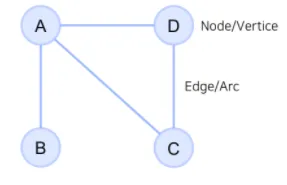

- 노드(Node)와 그 노드를 잇는 선(Edge)을 모아 구성한 자료 구조 
    - 노드: 현실 세계의 개체
    - 엣지: 개체간 관계나 상호작용 (방향 정보와 가중치 포함)

#### 그래프를 사용하는 이유
- 관계, 상호작용과 같은 추상적 개념을 다루기에 적합함
- Non-Euclidean space도 표현하고 학습할 수 있음
    - 격자 구조가 아닌 복잡하고 불규칙한 데이터를 모델링하고 학습할 수 있음

### (2) GNN의 구조

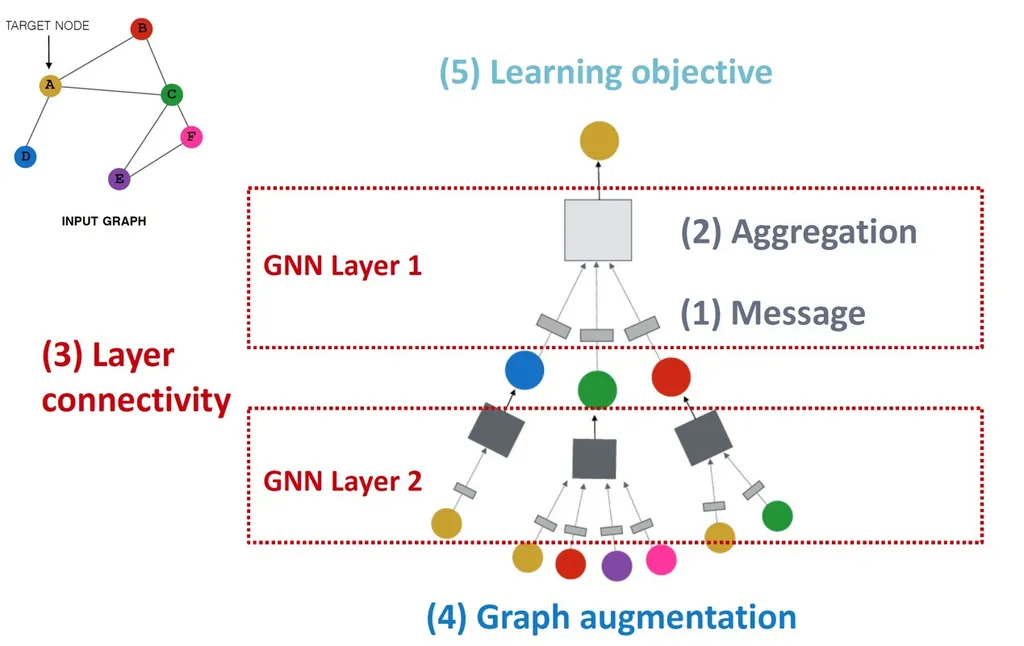

1. **[그래프 구조 생성]** 노드는 개별 객체, 엣지는 객체 간 관계나 연결성을 의미함
2. **[메시지 패싱]** 각 노드가 이웃 노드로부터 정보를 받아 전달
    1. **[메시지 생성]** 이웃 노드로에 전달할 메시지 생성
    2. **[집계]** 받은 여러 이웃의 메시지를 하나로 합침 
    3. **[갱신]** 자신의 노드 상태를 업데이트함
3. **[최종 출력]**

### (3) LightGCN (Light Graph Convolutional Networks)

- GCN의 한 종류이자 GNN의 한 종류
- 추천 시스템에 특화된 GNN으로, 복잡성을 제거하고 최적화한 버전

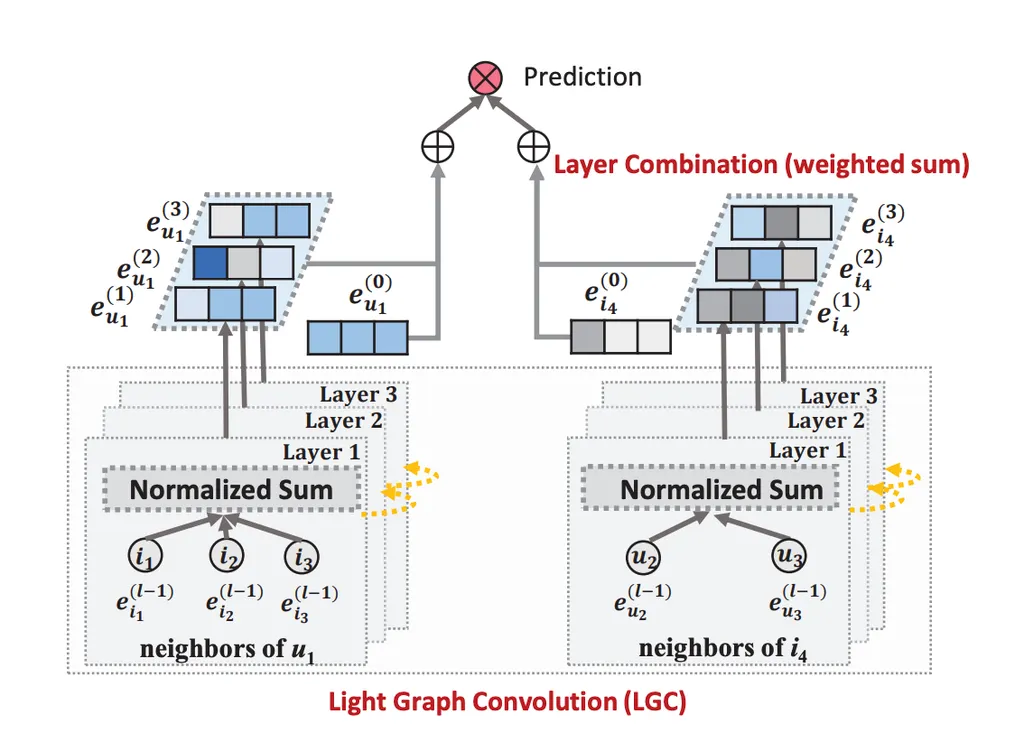

- GNN의 구성 요소 2가지 제거
    1. 특징 변환 (Feature Transformation) 제거
    - 레이어미디 복잡했던 학습 파라미터 삭제
    2. 비선형 활성화 함수 (Non-linear Activation) 제거
    - ReLU와 같은 활성화 함수를 사용하지 않고, 이웃 정보 합침\
    -> 주로 정규화된 합 혹은 평균 사용

    
=> LightGCN은 오직 정규화된 이웃 임베딩의 합으로만 구성됨
- CF의 본질에 충실하게 '그래프 구조'와 '전파'라는 핵심만 남긴 매우 효율적인 모델

### (4) GNN의 장단점
- 장점
    1. 고차원 협업 시그널 포착
        - 단순히 '나' 잠재 요인 분석을 넘어, 나와 취향이 비슷한 사용자들고 ㅏ내가 본 아이템과 연관된 다른 아이템들으 정보를 직접 반복해서 반영
    2. 정형화되지 않은 데이터 학습 가능
        - GNN은 '관계'를 학습하기 때문에, 각 노드가 정형화된 데이터로 정의되지 않아도 관계망 속에서 정보를 효과적으로 전파할 수 있음
    3. Cold Start 문제 완화에 효과적
        - 신규 사용자나 아이템에 대한 데이터가 부족해 추천을 생성하기 어려웠던 기존 방식과 달리, 노드의 고유 특징과 주변 이웃과의 관계를 활용해 즉시 임베딩 생성
- 단점
    1. 과평탄화 (Over-Smoothing) 문제
        - 모든 노드의 임베딩이 같은 값으로 수렴하는 현상
        - 메시지 전달을 많이 반복해 GNN 모델의 레이어가 많아질수록, 연결된 그래프 내의 모든 노드 간 임베딩이 비슷해지는 문제가 발생
    2. 과압축 문제
        - GNN의 층이 깊어질수록 집계하는 이웃의 범위가 매우 커져, 이를 고정된 크기의 벡터 하나에 모두 압축하려고 하면 정보 손실
    3. 계산 복잡도 증가
        - 실제 세계에서는 수십억 개 노드와 엣지가 포함된 그래프에 GNN을 적용해야 하므로 막대한 자원과 메모리 요구됨
    4. 해석의 어려움
        - GNN은 모든 상호작용을 집합으로 보지만, 순서 반영은 못함.

## 3) Transformer 기반 추천 시스템

### (1) 기존 추천 시스템의 한계
- 순차적 정보를 다루지 못한다!

### (2) Transformer: 사용자 행동을 순서로 접근
- 행동 순서가 중요한 이유: '문맥'과 '핵심 의도' 파악



### (3) Transformer의 핵심: Self-Attention
- 시퀀스 내 모든 아이템 간의 관계를 거리 상관없이 동시에 계산
- "이 아이템을 클릭한 것은 30분 전 클릭이 아니라 3일 전 클릭과 더 관련이 있을 수 있다"는 직관적 해석 가능하게 함

#### 동작원리
-  "관련성"을 찾기 위해 현재 아이템(Query)이 다른 모든 아이템(Key)을 "참조"하고, 관련성이 높은 아이템의 "정보(Value)"를 가져오는 과정

    - **Query (Q):** 관련 정보를 요청하는 주체. (예: "내가 지금 보고 있는 이 '토너'와 관련된 정보는?")
    - **Key (K):** 정보의 종류를 나타내는 '색인' 또는 '태그'. (예: 시퀀스 내 다른 아이템인 '프린터', '가습기' 등이 "나는 이런 특징이야"라고 들고 있는 푯말)
    
    - **Value (V):** 정보의 '내용물'. (예: '프린터', '가습기'가 실제로 담고 있는 의미와 특징)

#### 연산과정
- "관련성"을 계산해 "가중치" 만들기
    1. **ttention Score 계산 (Q·K):** Query(현재 토너)가 모든 Key(프린터, 가습기, ...)와 얼마나 유사한지(관련 있는지) 유사도(주로 내적)를 통해 '관련성 점수'를 계산합니다.
    2. **가중합 (Weighted Sum) (Score·V):** 이 '관련성 점수'를 (Softmax를 거쳐) '가중치'로 변환합니다.
    3. 이 가중치를 각 아이템의 Value(실제 내용물)에 곱하여 모두 더합니다. (가중 평균)

    => 아이템 간 관련성에 따라 정보 반영률(V)이 차등 적용됨
    - '현재 토너'와 관련성이 높은 '프린터'의 정보는 강하게 반영되고, 관련성이 낮은 '가습기'의 정보는 약하게 반영된 새로운 '문맥 벡터' 생성

### (4) Transformer 기반 주요 추천 시스템 모델

#### SASRec (Self-Attentive Sequential Recommendation)
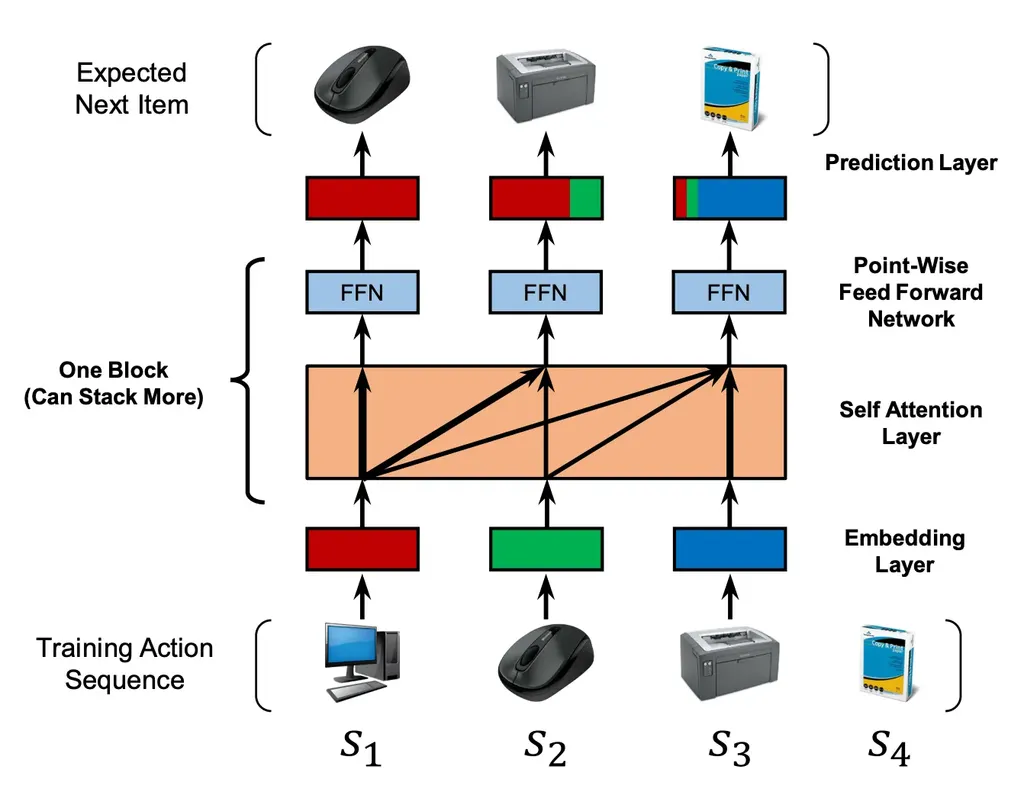
- 방식: 단방향 어텐션
- 어텐션 계산: 오직 과거의 아이템들만 참조 (미래 정보 차단)
- 목표: 다음 아이템 예측
- 특징:
    - 과거 정보만 활용해 시간의 흐름 명확히 반영
    - 학습 과정이 사용자의 '다음 행동'을 예측하는 데 집중
- 문제점:  
    - 계산량 많음
    - 단방향성

#### BERT4Rec (BERT for Recommendation)
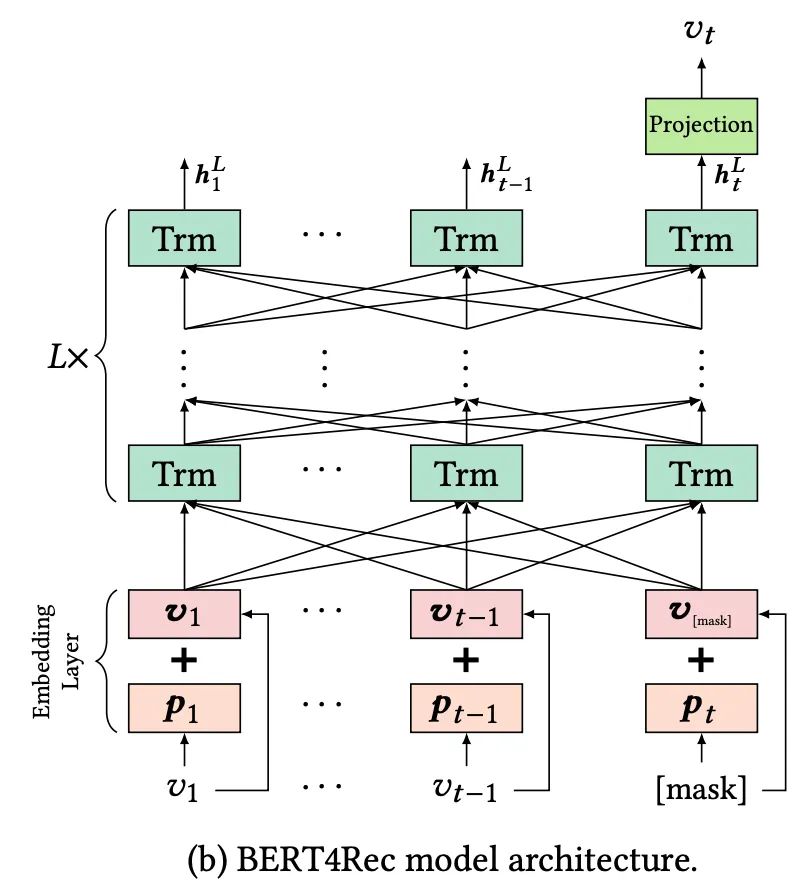
- 방식: 양방향 어텐션
- 어텐션 계산: 시퀀스 일부를 마스킹하고 가려진 아이템이 '과거와 미래의 모든 아이템' 참조
- 목표: 시퀀스 내 가려진 아이템 예측
- 특징:
    - 아이템의 양방향 문맥을 모두 고려
    - 학습 과정에서 시퀀스 전체의 선호도를 파악하는 데 집중

## 진짜 최신 트렌드: LLM

- 추천을 랭킹 문제가 아닌 언어 문제로 접근
- 과거: 조합별로 미리 학습된 공식에 따라 점수 출력
- LLM: 추천을 점수 계산이 아닌 문장으로 출력

=> 단순한 랭킹이 아닌, 사용자의 상황에 맞는 이유를 덧붙인 서술형 추천

- 대화형 추천: 메타데이터에만 의존하지 않고 사용자가 입력한 자연어 요청 텍스트 전반을 이해하고 추천 가능
- Zero-shot 추천: 학습 데이터에 없던 새로운 아이템도 아이템의 '텍스트 설명'만으로 그럴싸한 추천 가능\
    => Cold-Start 문제 강력한 해결책!

### P5
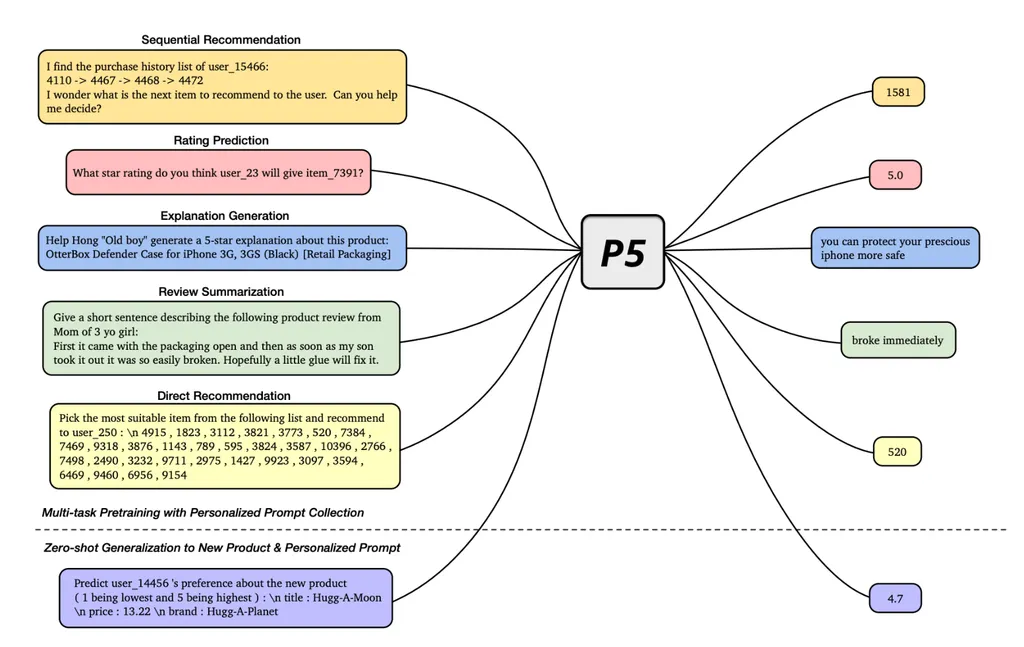
- 모든 추천 과제를 LLM이 풀 수 있도록 '하나의 거대한 텍스트 프롬프트' 문제로 통일시킨 모델

#### TALLRec
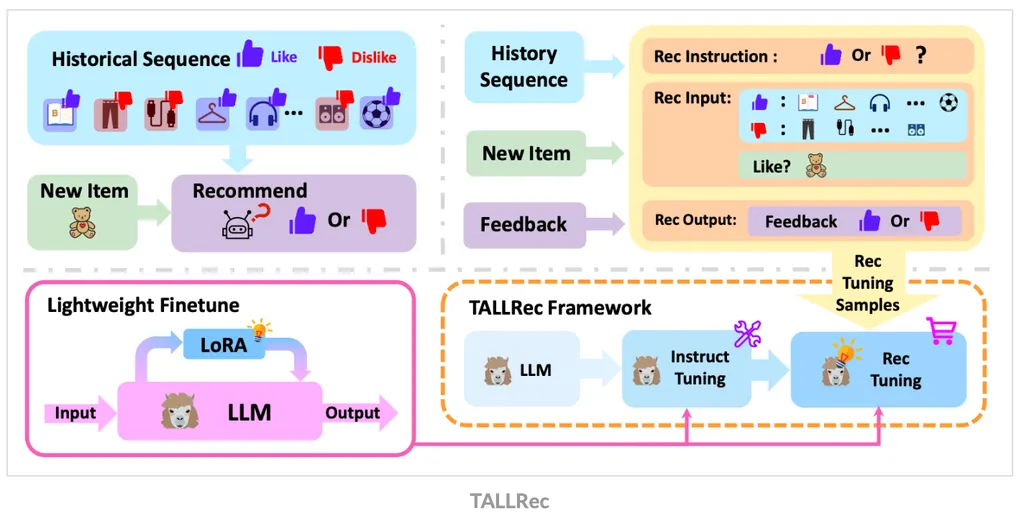
- P5처럼 처음부터 다 학습시키긴 비싸니, 이미 잘 만들어진 범용 LLM을 추천 작업에 맞게 효율적으로 튜닝하는 프레임워크

## 현업의 고민: 책임감 있는 AI
- 모델의 성능만이 다가 아니다!

### 1) 인기 편향
- 추천 시스템이 소수의 인기 아이템을 과도하게 노출하는 반면, 다수의 비인기 아이템이 받아야 할 관심을 받지 못하는 현상
### 2) 설명가능성 (XAI)
- 이걸 왜 추천했는지 설명 가능한지
- 딥러닝 모델은 강력하지만 블랙박스 문제 존재
- "왜 이걸 나에게 추천했는지" 고객을 설득해야 하고, 비즈니스 담당자에게 추천의 근거를 제시할 수 있어야 함

### 딥러닝 모델만 사용할 수 없는 이유

#### 비용 문제
- 막대한 연산량, 수많은 GPU 필요
- 모든 아이템에 실시간 스코어링 -> 막대한 서버비
- 대규모 트래픽 서비스에서는 지속 비용 감당 불가

=> 현업에서는 선형 기반 추천 시스템과 병행되서 사용되는 중 !!
- 선형 모델 = 빠르고 안정저, 해석 용이
- 딥러닝/LLM = 강력하지만 무겁고 복잡

- 1단계: 후보군 생성
    - 목표: 사용자가 조금이라도 좋아할 만한 아이템 수백 개를 매우 빠르게 골라내기
    - 사용 모델: 선형 모델
        - 속도와 비용 효율성

- 2단계: 순위 매기기
    - 목표: 추려진 후보군을 대상으로 사용자가 가장 좋아할 순서대로 정교하게 순위 매기기
    - 사용 모델: 딥러닝 모델 (GNN, Transformer, VAE)
        - 높은 정확도와 복잡한 패턴의 학습